___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)

### The Imports

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import xml.etree.ElementTree as ET

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

In [2]:
start_date = dt.datetime(2006, 1, 1)
end_date = dt.datetime(2016, 1, 1)

# Getting the ALPHAVANTAGE_API_KEY
tree = ET.parse(r"C:\temp\Project_Keys.xml")
root = tree.getroot()
ALPHAVANTAGE_API_KEY = root.find('./ALPHAVANTAGE').text

bac = pdr.data.DataReader("BAC", "av-daily", start=start_date, end=end_date,
                          api_key=ALPHAVANTAGE_API_KEY)
c = pdr.data.DataReader("C", "av-daily", start=start_date, end=end_date,
                          api_key=ALPHAVANTAGE_API_KEY)
gs = pdr.data.DataReader("GS", "av-daily", start=start_date, end=end_date,
                          api_key=ALPHAVANTAGE_API_KEY)
jpm = pdr.data.DataReader("JPM", "av-daily", start=start_date, end=end_date,
                          api_key=ALPHAVANTAGE_API_KEY)
ms = pdr.data.DataReader("MS", "av-daily", start=start_date, end=end_date,
                          api_key=ALPHAVANTAGE_API_KEY)

In [3]:
wfc = pdr.data.DataReader("WFC", "av-daily", start=start_date, end=end_date,
                          api_key=ALPHAVANTAGE_API_KEY)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['BAC', 'GS', 'C', 'WFC', 'JPM', 'MS']
tickers.sort()

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc], axis=1, keys=tickers)
bank_stocks.head()

BAC                                     C                       \
             open   high    low  close    volume   open   high    low  close   
2006-01-03  46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04  47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05  46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06  46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09  46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

                      ...     MS                                    WFC  \
              volume  ...   open   high      low  close   volume   open   
2006-01-03  15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04  18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05  11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06  13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09  16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

                                          
             high    low  close   volume  
2006-01-03  63.95  62.39  63.80  5508200  
2006-01-04  63.64  62.73  63.06  5435000  
2006-01-05  63.11  62.62  62.99  5079000  
2006-01-06  63.55  62.77  63.36  4201900  
2006-01-09  63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

** Set the column name levels**

In [6]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs('close', level=1, axis=1).apply(np.max)

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [10]:
for ticker in tickers:
    returns[ticker + ' Return'] = bank_stocks[(ticker, 'close')].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?****

In [11]:
import seaborn as sns
sns.set_style('whitegrid')

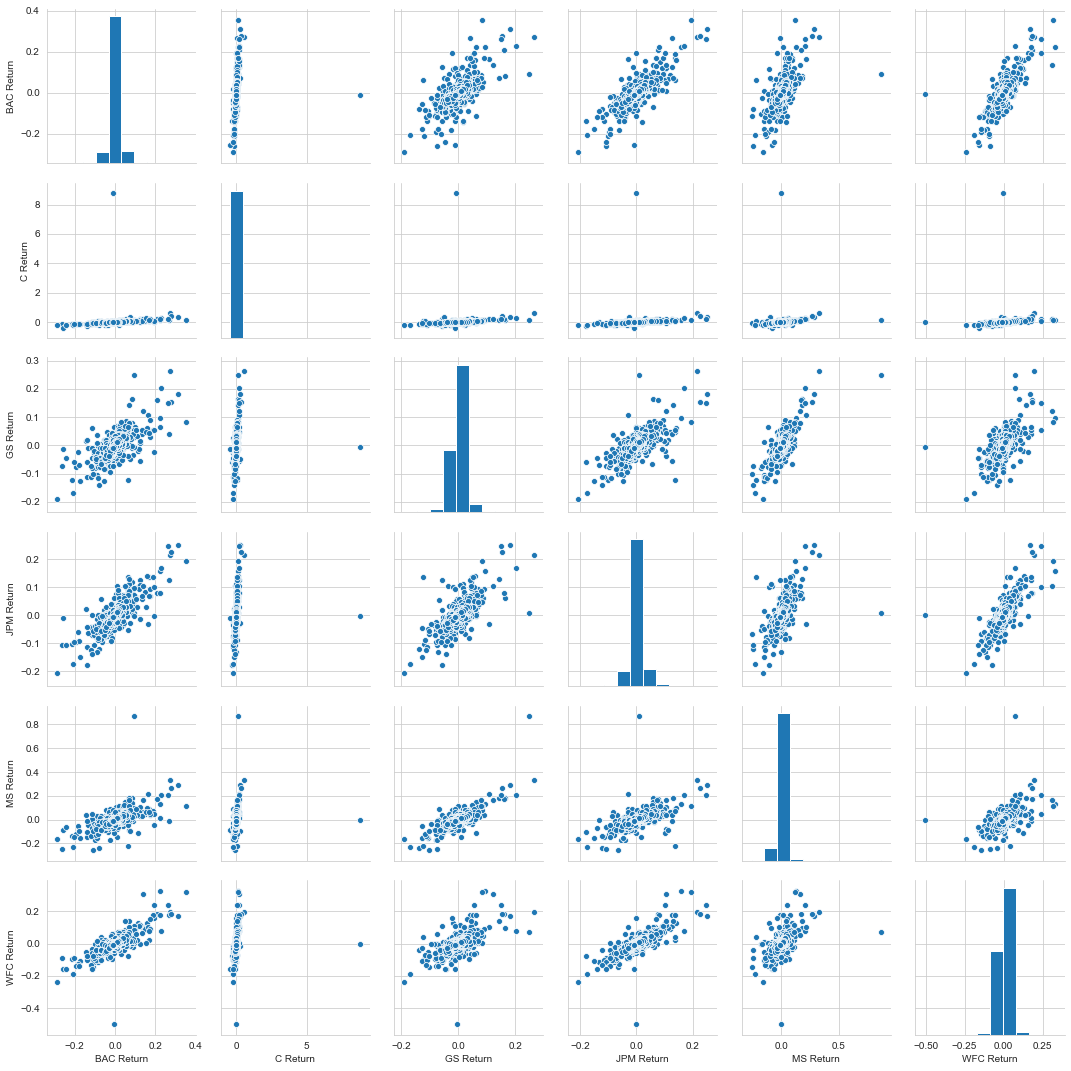

In [12]:
sns.pairplot(returns[1:])

In [13]:
# Citigroup (C) stock stands out.
# On the first look, there doesn't seem to be much correlation between it
# and any of the other stocks. However, looking at the plots more closely, 
# the range of the returns for 'C' is much larger- it goes beyond 8% whereas 
# the ranges of most stocks don't cross 0.4%.

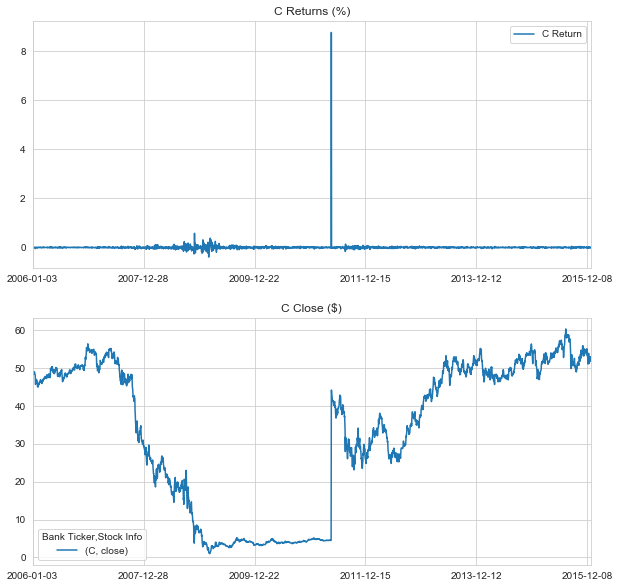

In [14]:
# Looking closer at the 'C' stock.

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
# Plotting C Returns
axes[0].set_title('C Returns (%)')
returns[['C Return']].plot(ax=axes[0])
# Plotting C Close price
axes[1].set_title('C Close ($)')
bank_stocks[[('C', 'close')]].plot(ax=axes[1])

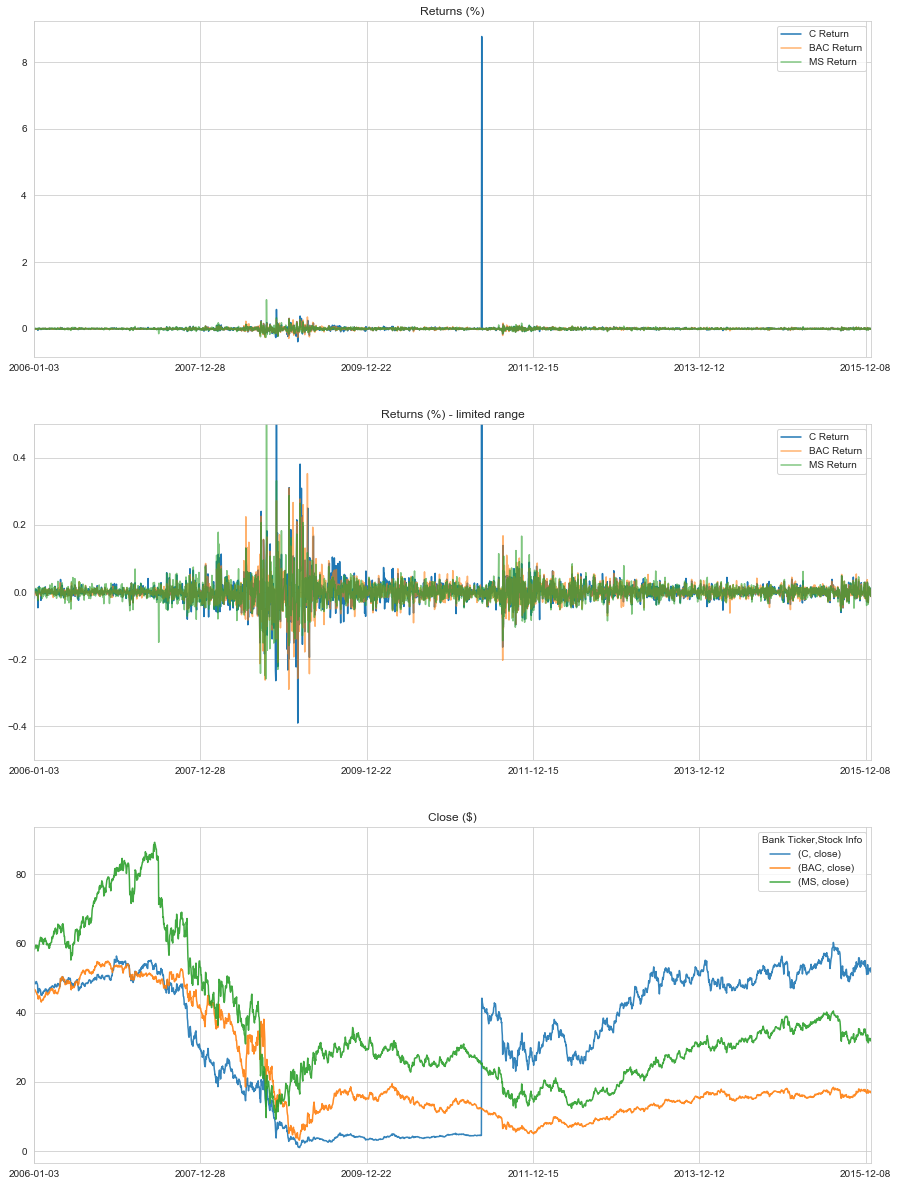

In [15]:
# Comparing the 'C' data with that of other stocks.
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(15, 21)
# Plotting Returns
axes[0].set_title('Returns (%)')
returns[['C Return']].plot(ax=axes[0])
returns[['BAC Return', 'MS Return']].plot(ax=axes[0], alpha=.6)
axes[1].set_title('Returns (%) - limited range')
returns[['C Return']].plot(ax=axes[1], ylim=[-.5, .5])
returns[['BAC Return', 'MS Return']].plot(ax=axes[1], ylim=[-.5, .5], alpha=.6)
# Plotting C Close price
axes[2].set_title('Close ($)')
bank_stocks[[('C', 'close'), ('BAC', 'close'), ('MS', 'close')]].plot(ax=axes[2],
                                                                      alpha=.9)

In [16]:
# It can be seen from the above plots that 'C' stock didn't move that
# differently comapred to the others.
# There was an outlier day of large return for Citigroup, which was...
returns['C Return'].idxmax()

'2011-05-09'

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
returns.idxmax()  # Dates of best returns

BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

In [18]:
returns.idxmin()  # Dates of worst returns

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2006-08-14
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [19]:
returns.std()

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037821
WFC Return    0.031838
dtype: float64

In [20]:
# Citigroup looks the riskiest, however, as explained above, 
# there was an outlier return on 2011-05-09.
# Taking this into account...
returns.drop('2011-05-09').std()

BAC Return    0.036635
C Return      0.038667
GS Return     0.025363
JPM Return    0.027656
MS Return     0.037828
WFC Return    0.031844
dtype: float64

In [21]:
# Citigroup isn't that much riskier than Morgan Stanley or 
# Bank of America

In [22]:
returns['2011-05-10':'2016-12-31'].std()

BAC Return    0.023166
C Return      0.021542
GS Return     0.016983
JPM Return    0.017153
MS Return     0.024025
WFC Return    0.014937
dtype: float64

In [23]:
returns['2015-01-01':'2015-12-31'].std()  # std() for 2015

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

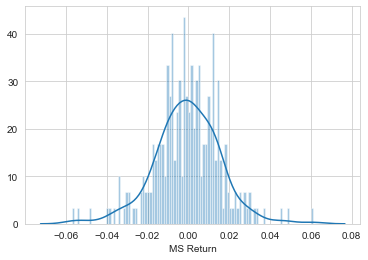

In [24]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31', 'MS Return'], bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

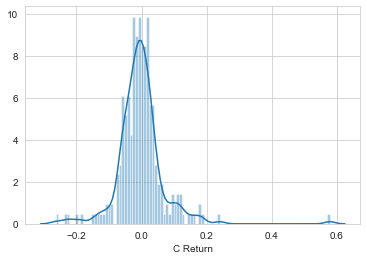

In [25]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31', 'C Return'], bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

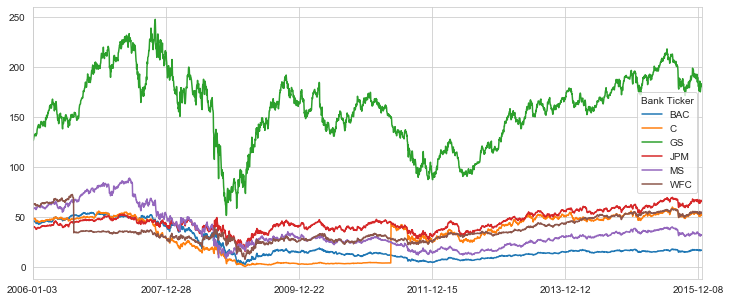

In [26]:
bank_stocks.xs('close', axis=1, level=1).plot(figsize=(12,5))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

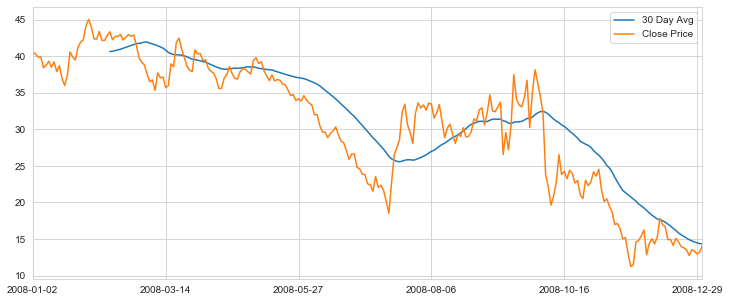

In [27]:
bank_stocks.loc['2008-01-01':'2008-12-31', ('BAC', 'close')].rolling(
    window=30).mean().plot(figsize=(12, 5), label='30 Day Avg', legend=True)
bank_stocks.loc['2008-01-01':'2008-12-31', ('BAC', 'close')].plot(
    label='Close Price', legend=True)

** Create a heatmap of the correlation between the stocks Close Price.**

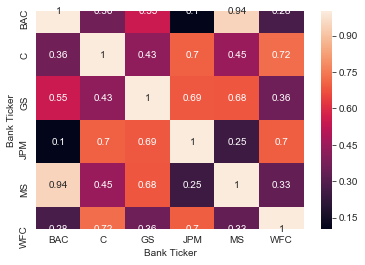

In [28]:
sns.heatmap(data=bank_stocks.xs('close', axis=1, level=1).corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

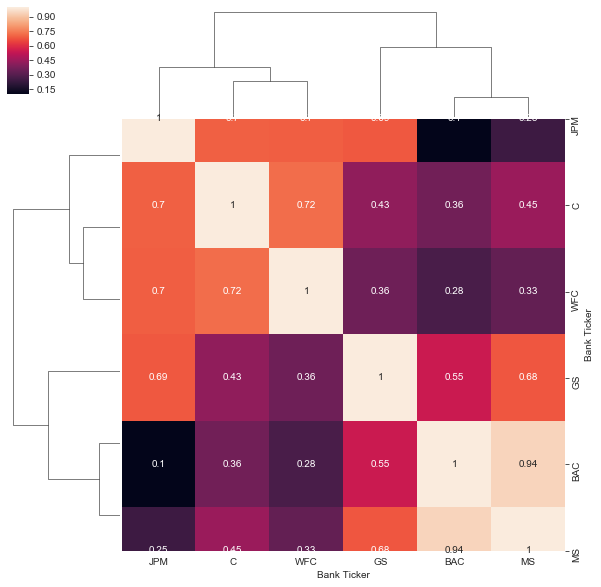

In [29]:
sns.clustermap(data=bank_stocks.xs('close', axis=1, level=1).corr(), annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [30]:
import plotly
import cufflinks as cf
cf.go_offline()

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [31]:
bank_stocks.xs('BAC', axis=1).iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [32]:
bank_stocks.loc['2015-01-01':'2015-12-31', ('MS', 'close')].ta_plot(study='sma')

** Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015. **

In [33]:
bank_stocks.loc['2015-01-01':'2015-12-31', ('BAC', 'close')].ta_plot(study='boll')